#Assignment 5

AADHYA ENLLAWAR, VIT-AP, 21BCE8096

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

<ipython-input-6-5365bbd1c280>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


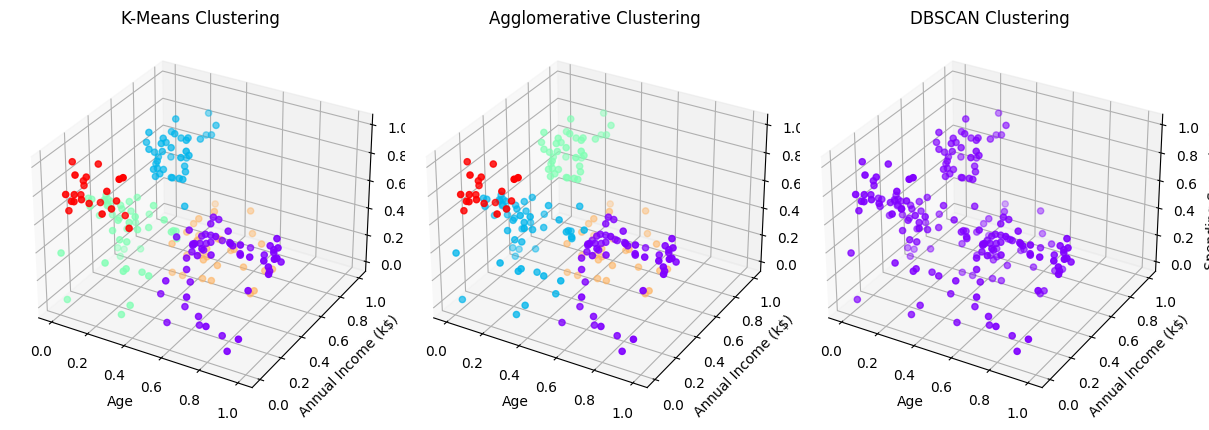

K-Means Silhouette Score: 0.41
Agglomerative Silhouette Score: 0.40


In [6]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())
df.dropna(inplace=True)
df.fillna(df.mean(), inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
from sklearn.model_selection import train_test_split
X = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=5)
dbscan = DBSCAN(eps=3, min_samples=5)
kmeans_labels = kmeans.fit_predict(X)
agg_labels = agg_clustering.fit_predict(X)
dbscan_labels = dbscan.fit_predict(X)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans_labels, cmap='rainbow')
ax1.set_xlabel('Age')
ax1.set_ylabel('Annual Income (k$)')
ax1.set_zlabel('Spending Score (1-100)')
ax1.set_title('K-Means Clustering')
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=agg_labels, cmap='rainbow')
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_zlabel('Spending Score (1-100)')
ax2.set_title('Agglomerative Clustering')
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=dbscan_labels, cmap='rainbow')
ax3.set_xlabel('Age')
ax3.set_ylabel('Annual Income (k$)')
ax3.set_zlabel('Spending Score (1-100)')
ax3.set_title('DBSCAN Clustering')
plt.tight_layout()
plt.show()
kmeans_score = silhouette_score(X, kmeans_labels)
agg_score = silhouette_score(X, agg_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.2f}")
print(f"Agglomerative Silhouette Score: {agg_score:.2f}")